<a href="https://colab.research.google.com/github/akashinferno/Emergency_Tweets_classifier/blob/main/Emergency_Tweets_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tweets Sentiment Analysis-Emergency Classifier**

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [51]:
from google.colab import  files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [52]:
df=pd.read_csv("train.csv")

In [53]:
df.head(20)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


#Exploratory Data Analysis

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [55]:
df['location'].isnull().sum()


np.int64(2533)

In [56]:
df['keyword'].isnull().sum()


np.int64(61)

221
keyword
fatalities     45
deluge         42
armageddon     42
damage         41
body%20bags    41
harm           41
sinking        41
evacuate       40
outbreak       40
fear           40
Name: count, dtype: int64


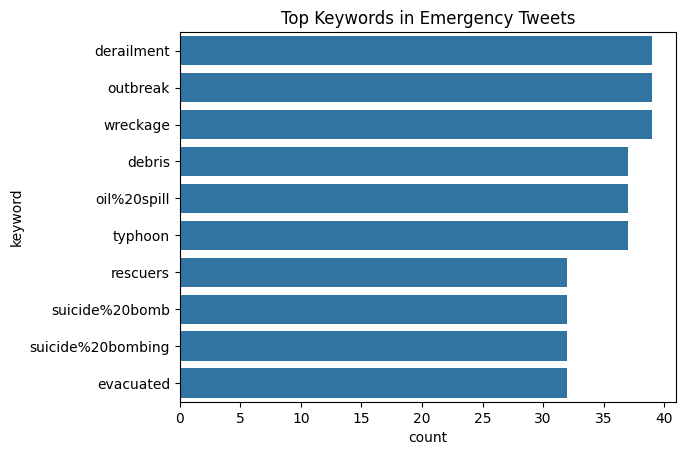

In [57]:
print(df['keyword'].nunique())
print(df['keyword'].value_counts().head(10))

sns.countplot(y='keyword', data=df[df['target'] == 1], order=df[df['target'] == 1]['keyword'].value_counts().head(10).index)
plt.title('Top Keywords in Emergency Tweets')
plt.show()


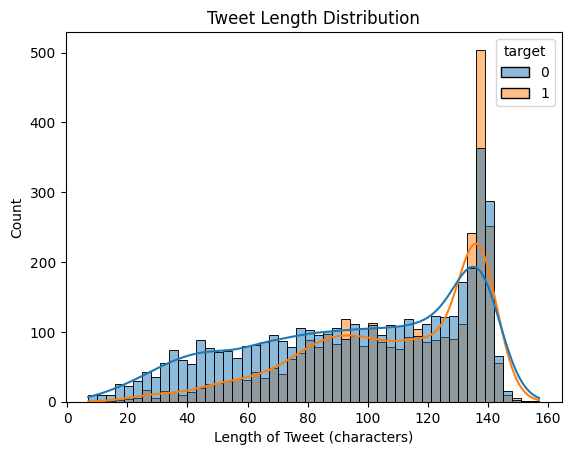

In [58]:
df['text_len'] = df['text'].apply(len)

sns.histplot(data=df, x='text_len', hue='target', bins=50, kde=True)
plt.title("Tweet Length Distribution")
plt.xlabel("Length of Tweet (characters)")
plt.show()

In [59]:
df['keyword'] = df['keyword'].fillna('none')


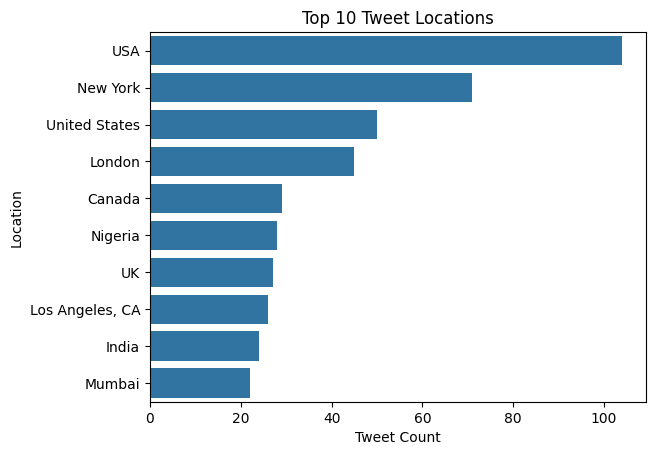

In [60]:
if 'location' in df.columns:
    top_locations = df['location'].value_counts().head(10)
    sns.barplot(y=top_locations.index, x=top_locations.values)
    plt.title("Top 10 Tweet Locations")
    plt.xlabel("Tweet Count")
    plt.ylabel("Location")
    plt.show()

# Text Preprocessing

In [61]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [62]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [63]:
# removing lowercase
df['clean_text'] = df['text'].str.lower()

# removing links
df['clean_text'] = df['clean_text'].str.replace(r"http\S+", "", regex=True)

# removing @ mentions
df['clean_text'] = df['clean_text'].str.replace(r"@\w+", "", regex=True)

# eemoving #
df['clean_text'] = df['clean_text'].str.replace(r"#", "", regex=True)

# removing non alphabet
df['clean_text'] = df['clean_text'].str.replace(r"[^a-z\s]", "", regex=True)

In [64]:
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join(
    [lemmatizer.lemmatize(word) for word in x.split() if word not in stop_words]
))

In [65]:
df

,id,keyword,location,text,target,text_len,clean_text
0,1,none,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,deed reason earthquake may allah forgive u
1,4,none,NaN,Forest fire near La Ronge Sask. Canada,1,38,forest fire near la ronge sask canada
2,5,none,NaN,All residents asked to 'shelter in place' are ...,1,133,resident asked shelter place notified officer ...
3,6,none,NaN,"13,000 people receive #wildfires evacuation or...",1,65,people receive wildfire evacuation order calif...
4,7,none,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,got sent photo ruby alaska smoke wildfire pour...
...,...,...,...,...,...,...,...
7608,10869,none,NaN,Two giant cranes holding a bridge collapse int...,1,83,two giant crane holding bridge collapse nearby...
7609,10870,none,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,control wild fire california even northern par...
7610,10871,none,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,utckm volcano hawaii
7611,10872,none,NaN,Police investigating after an e-bike collided ...,1,137,police investigating ebike collided car little...


In [66]:
df = df.drop(columns=['location'])
#too many Null values in location colum

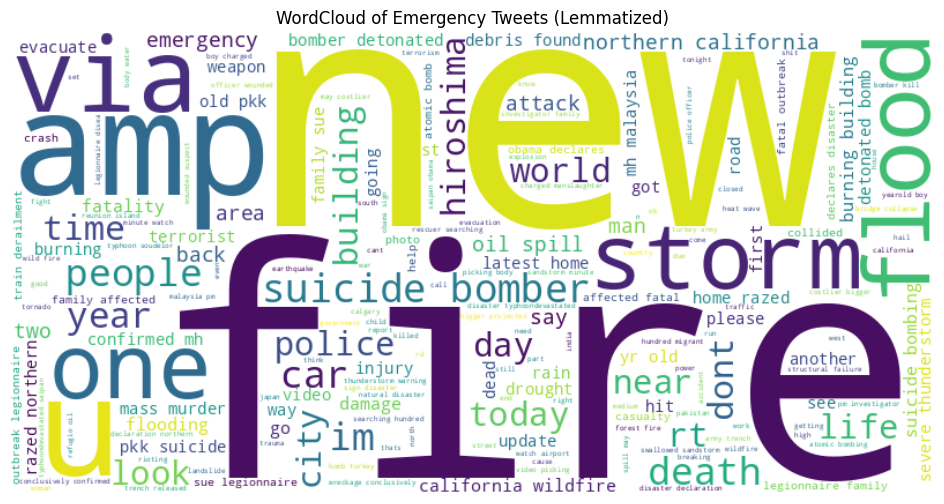

In [67]:
emergency_text = " ".join(df[df['target'] == 1]['clean_text'])
wc = WordCloud(width=800, height=400, background_color='white').generate(emergency_text)
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.title("WordCloud of Emergency Tweets (Lemmatized)")
plt.axis('off')
plt.show()

In [68]:
label_encoder = LabelEncoder()
df['keyword_encoded'] = label_encoder.fit_transform(df['keyword'])

In [69]:
#TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)

X_text = vectorizer.fit_transform(df['clean_text'])


In [70]:
X_text

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 55334 stored elements and shape (7613, 5000)>

In [71]:
from scipy.sparse import csr_matrix,hstack
keyword_vec = csr_matrix(df['keyword_encoded'].values.reshape(-1, 1))


In [72]:
X = hstack([X_text, keyword_vec])


In [73]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 62911 stored elements and shape (7613, 5001)>

In [74]:
df['num_hashtags'] = df['text'].str.count('#')
df['num_mentions'] = df['text'].str.count('@')
df['num_exclaims'] = df['text'].str.count('!')
df['tweet_length'] = df['text'].apply(len)

In [75]:
numeric_features = df[['tweet_length', 'num_hashtags', 'num_mentions', 'num_exclaims']]
numeric_features['target'] = df['target']

correlations = numeric_features.corr()['target'].sort_values(ascending=False)
print(correlations)

target          1.000000
tweet_length    0.181817
num_hashtags    0.058115
num_exclaims   -0.074543
num_mentions   -0.103343
Name: target, dtype: float64


/tmp/ipython-input-365680029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_features['target'] = df['target']


*These new features , not so usefull,Because very weak correlation with target

In [76]:
y = df['target']

In [77]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
7608,1
7609,1
7610,1
7611,1


In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model Training

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


In [80]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)


LogisticRegression(max_iter=500)

In [81]:
y_pred = model.predict(X_test)


In [82]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8023637557452397
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       874
           1       0.83      0.67      0.74       649

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523



In [83]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [84]:
print("NB Accuracy:", accuracy_score(y_test, y_pred_nb))


NB Accuracy: 0.7912015758371634


In [85]:
rf = RandomForestClassifier(n_estimators=150, max_depth=20, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [86]:
print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))


RF Accuracy: 0.7170059093893631


# Hyper Parameter Tuning

In [87]:
from sklearn.model_selection import GridSearchCV


RANDOM FOREST PARAMETER TUNING

In [88]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [89]:
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    cv=3,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1_weighted', verbose=2)

In [90]:
best_rf = grid_rf.best_estimator_
y_pred = best_rf.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Accuracy: 0.7747866053841103
F1 Score: 0.7721175869679033


Hyper Parameter Tuning for LogisticRegression:

In [91]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],     # Regularization strength
    'solver': ['liblinear', 'lbfgs'],# Solver type
    'max_iter': [500, 1000, 1500]
}

In [92]:
grid = GridSearchCV(
    LogisticRegression(max_iter=500),
    param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='accuracy',
    verbose=2,
    n_jobs=-1           # use all cores
)

In [94]:
grid.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [500, 1000, 1500],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy', verbose=2)

In [95]:
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'C': 1, 'max_iter': 500, 'solver': 'liblinear'}
Best Score: 0.7977011494252875


In [96]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Final Accuracy:", accuracy_score(y_test, y_pred))

Final Accuracy: 0.8010505581089954


In [97]:
from sklearn.metrics import f1_score, classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("F1 Score (weighted):", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.8010505581089954
F1 Score (macro): 0.7900910879379557
F1 Score (weighted): 0.7971769522726797


In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm

array([[784,  90],
       [213, 436]])